In [1]:
%matplotlib notebook
import matplotlib
matplotlib.rcParams['svg.fonttype'] = 'none'
font = {'family' : 'Arial',
    'weight' : 'medium',
    'size'   : 20,
    'style'  : 'normal'}

matplotlib.rc('font', **font)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from natsort import os_sorted

# Import shared_functions
import sys
import os
sys.path.insert(0, str(Path(os.getcwd()).parent))
import shared_functions

C:\Users\tadres\Miniconda3\envs\depol_block_publication\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
root_path = Path('G:\\My Drive\\PhD\\Papers\\Vanishing spikes\\all_data\\ephys')
#save_path = Path('G:\\My Drive\\PhD\\Papers\\Vanishing spikes\\plots\\Fig4\\ephys')
save_path = 'Declare path'

Or42a_PA = Path(root_path, 'Or42aSF PA\\step stim')
Or13a_PA = Path(root_path, 'Or13aSF PA\\step stim')


colors = ['cyan',
          'orange',
          ]

markerstyle = ['x',
               'D']
markersize = 300

conc_to_useOr42a = [
    'PA 1uM',
    'PA 100uM',
    'PA 10000uM'
]

conc_to_useOr13a = [
    'PA 1uM',
    'PA 100uM',
    'PA 10000uM'
]


In [4]:
start_time = 23 # seconds after OB1 turned on
end_time = 25 # seconds after OB1 turned on

Or42aSF_PA_mean_later, Or42aSF_PA_odor_conc, \
    Or42aSF_PA_later, Or42aSF_PA_SEM_later = shared_functions.mean_spike_rate(
    Or42a_PA,
    conc_to_useOr42a,
    start_time, end_time)


Or13aSF_PA_mean_later, Or13aSF_PA_odor_conc, \
    Or13aSF_PA_later, Or13aSF_PA_SEM_later = shared_functions.mean_spike_rate(
    Or13a_PA,
    conc_to_useOr13a,
    start_time, end_time)

230000
PA 1uM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\ephys\Or42aSF PA\step stim\PA 1uM\Or42aSF PA_PA 1uM.csv
PA 100uM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\ephys\Or42aSF PA\step stim\PA 100uM\Or42aSF PA_PA 100uM.csv
PA 10000uM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\ephys\Or42aSF PA\step stim\PA 10000uM\Or42aSF PA_PA 10000uM.csv
230000
PA 1uM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\ephys\Or13aSF PA\step stim\PA 1uM\Or13aSF PA_PA 1uM.csv
PA 100uM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\ephys\Or13aSF PA\step stim\PA 100uM\Or13aSF PA_PA 100uM.csv
PA 10000uM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\ephys\Or13aSF PA\step stim\PA 10000uM\Or13aSF PA_PA 10000uM.csv


<IPython.core.display.Javascript object>


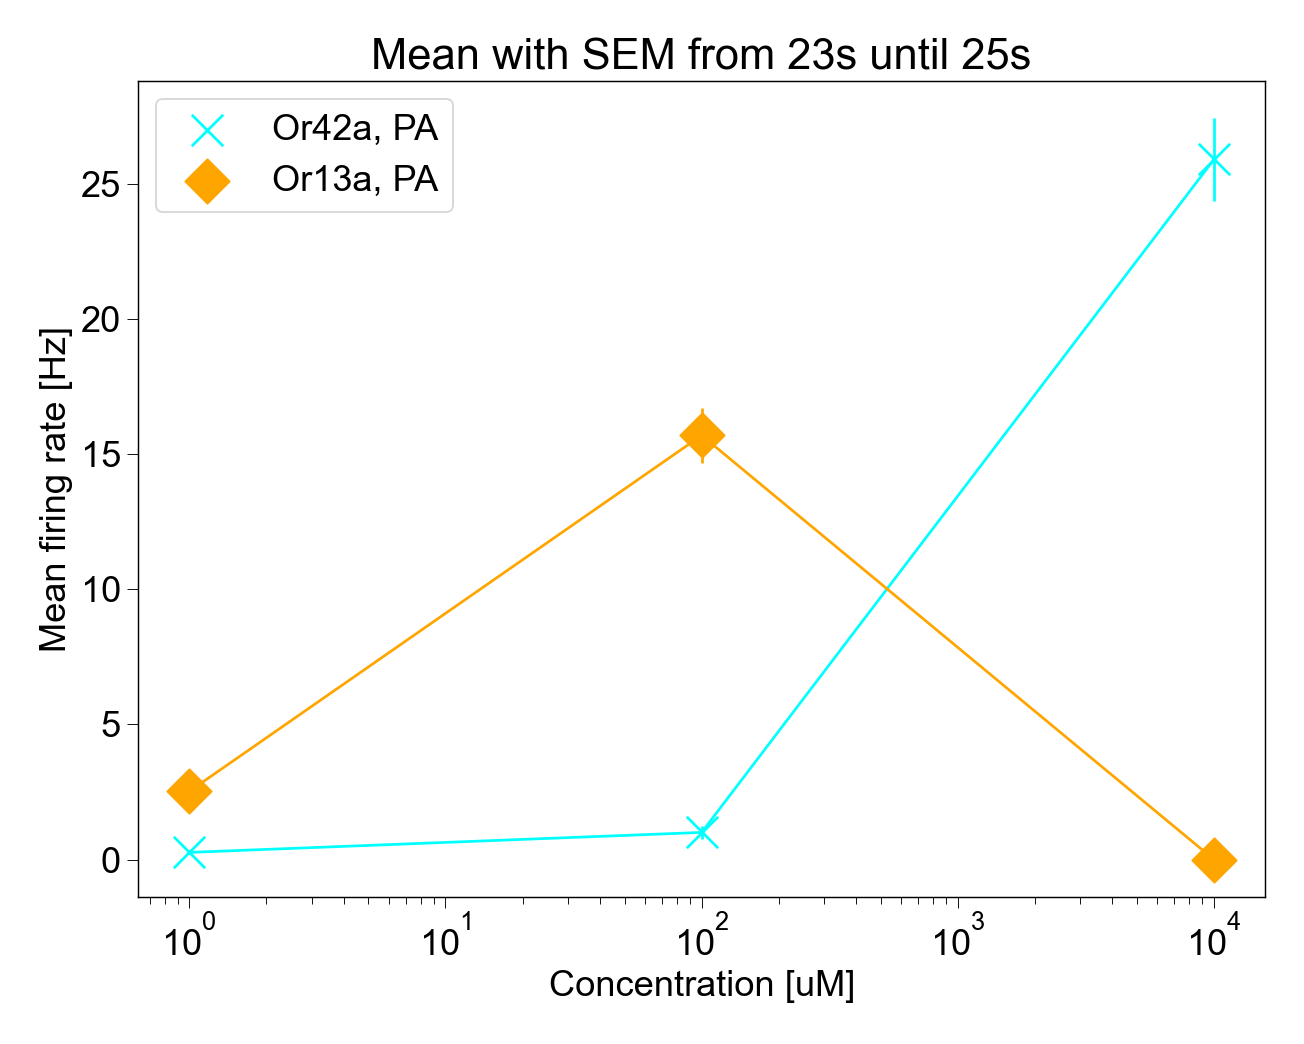

In [5]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)

# plot Or42b EtB
conc_Or42a_PA = []
for i in range(len(Or42aSF_PA_odor_conc)):
    conc_Or42a_PA.append(float((Or42aSF_PA_odor_conc[i]).split('uM')[0].split(' ')[-1]))
    if i == 0:
        ax.scatter(conc_Or42a_PA[i], Or42aSF_PA_mean_later[i], color = colors[0], label = 'Or42a, PA',  
                   marker=markerstyle[0], s=markersize)
    else:
        ax.scatter(conc_Or42a_PA[i], Or42aSF_PA_mean_later[i], color = colors[0], 
                   marker=markerstyle[0], s=markersize)
ax.errorbar(conc_Or42a_PA, Or42aSF_PA_mean_later, yerr=Or42aSF_PA_SEM_later, color=colors[0])

# plot Or1a EtB
conc_Or13a_PA = []
for i in range(len(Or13aSF_PA_odor_conc)):
    conc_Or13a_PA.append(float((Or13aSF_PA_odor_conc[i]).split('uM')[0].split(' ')[-1])/1)
    if i == 0:
        ax.scatter(conc_Or13a_PA[i], Or13aSF_PA_mean_later[i], color = colors[1], label = 'Or13a, PA',
                  marker=markerstyle[1], s=markersize)
    else:
        ax.scatter(conc_Or13a_PA[i], Or13aSF_PA_mean_later[i], color = colors[1],
                  marker=markerstyle[1], s=markersize)
ax.errorbar(conc_Or13a_PA, Or13aSF_PA_mean_later, yerr=Or13aSF_PA_SEM_later, color=colors[1])
ax.tick_params(axis='both', which='major', width=0.5, length = 6)
ax.tick_params(axis='both', which='minor', width=0.5, length = 4)
ax.set_xscale('log')
ax.set_ylabel('Mean firing rate [Hz]')
ax.set_xlabel('Concentration [uM]')
ax.legend()
ax.set_title('Mean with SEM from ' + repr(start_time) + 's until ' + repr(end_time) +'s')
fig.tight_layout()
#fig.savefig(Path(save_path, 'Fig6D_dose_response_PA_Or42a_Or13a_late_HIGHY.svg'))